<a href="https://colab.research.google.com/github/ImSahilShaikh/RetailDataAnalysis/blob/master/Retail_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Id :** 16



Group Members :
1. Sahil Shaikh   (33364)
2. Tanvi Madamwar (33367)
3. Manish Visave  (33370)

#Downloading Dataset From Kaggle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

#Loading Dataset
df = pd.read_csv("/content/drive/My Drive/RetailData/train.tsv",sep='\t')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset Description and Features

## This Dataset Is Used For Analysis Of Retail Market and Retail Price Prediction. 
Features/Columns In Dataset:
* train_id
* name
* item_condition_id
* category_name
* brand_name
* price
* shipping
* item_description


#Preprocessing Data

## Viewing Dataset

In [0]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Getting Info Of Dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


### Checking Dataset For Missing Values.

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64


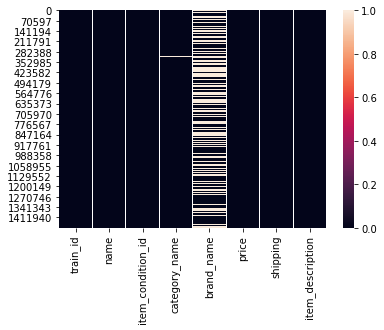

In [0]:
print(df.isna().sum())
import seaborn as sns

sns.heatmap(df.isna())

### Only three columns have missing values.

1. Brand_name
2. Category_name
3. Item_description

## Examining The Distribution of Price Column

In [0]:
df.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Distribution')

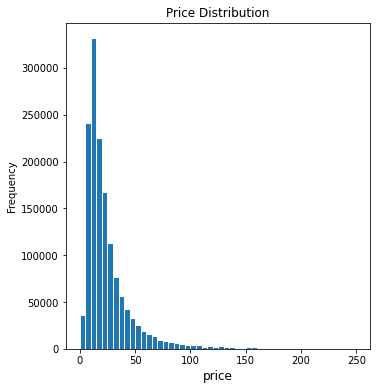

In [0]:
plt.subplot(1, 2, 1)
(df['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

#### Price Distribution is Skewed. To Make it in Normal Distribution we will take log transform of it.

Text(0.5, 1.0, 'Price Distribution')

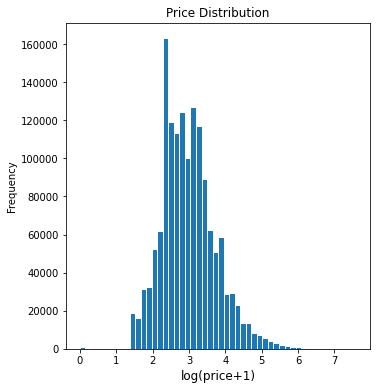

In [0]:
plt.subplot(1, 2, 2)
np.log(df['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

###### Relationship between shipping and price

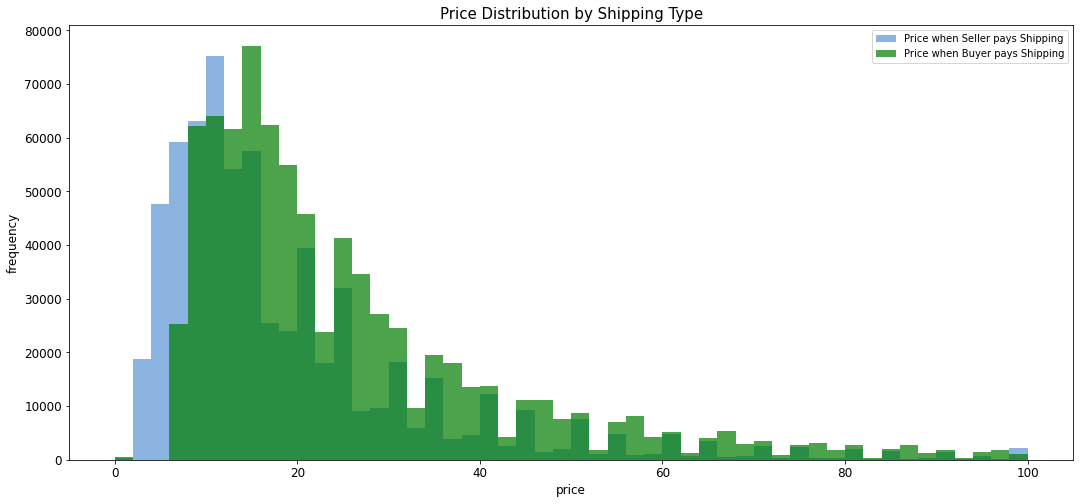

In [0]:
shipping_fee_by_buyer = df.loc[df['shipping'] == 0, 'price']
shipping_fee_by_seller = df.loc[df['shipping'] == 1, 'price']
fig, ax = plt.subplots(figsize=(18,8))

ax.hist(shipping_fee_by_seller, color='#8CB4E1', alpha=1.0, bins=50, range = [0, 100],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='#007D00', alpha=0.7, bins=50, range = [0, 100],
       label='Price when Buyer pays Shipping')

plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)

plt.legend()

plt.show()


In [0]:
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 22.57 if seller pays shipping
The average price is 30.11 if buyer pays shipping


#####  Compare after log transformation on the price.


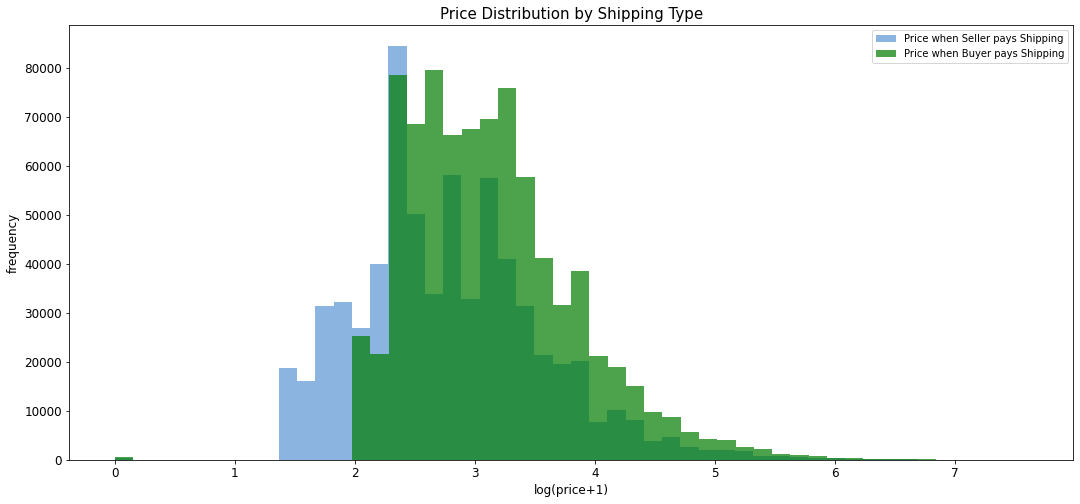

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(shipping_fee_by_seller+1), color='#8CB4E1', alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(shipping_fee_by_buyer+1), color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')

plt.xlabel('log(price+1)', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)

plt.legend()

plt.show()

###### Examining Category Column

In [0]:
print('There are', df['category_name'].nunique(), 'unique values in category name column')


There are 1287 unique values in category name column


In [0]:
## Top Categories In Dataset
df['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64

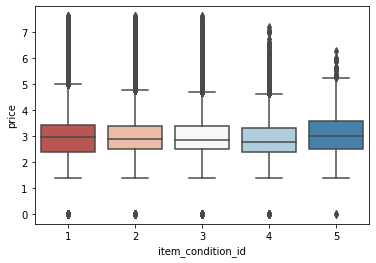

In [0]:
## item_condition_id vs price
sns.boxplot(x = 'item_condition_id', y = np.log(df['price']+1), data = df, palette = sns.color_palette('RdBu',5))

In [0]:
print('There are %d items that do not have a brand name.' %df['brand_name'].isnull().sum())
print('There are %d items that do not have a description.' %df['item_description'].isnull().sum())
print('There are %d items that do not have a Category Name.' %df['category_name'].isnull().sum())


There are 632682 items that do not have a brand name.
There are 4 items that do not have a description.
There are 6327 items that do not have a Category Name.


# Data Preperation

In [0]:
# Handling Missing Values
# One Intuition Could Be There are huge number of Missing Values In Two columns i.e., columns category_name and brand_name.
# so we could make those entries to belong to entire new category hence we are creating new category 'missing'
# using na values
#As far as item_description Column is Concerned it only has 4 missing values so we can delete those entries. 
df['category_name'].fillna(value='missing', inplace=True) 
df['brand_name'].fillna(value='missing', inplace=True)  
df = df.dropna(how='any',axis=0)


Checking Missing Value Count After Filling all values for cross verification

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64


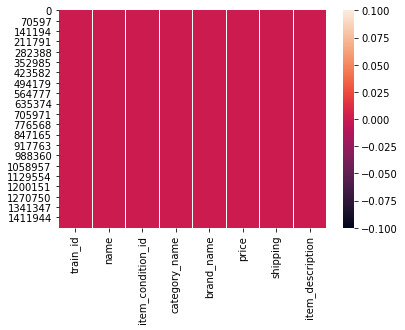

In [0]:
print(df.isna().sum())
import seaborn as sns
sns.heatmap(df.isna())

## Visualizing The Relationship of each numerical column with each other

using pairplot

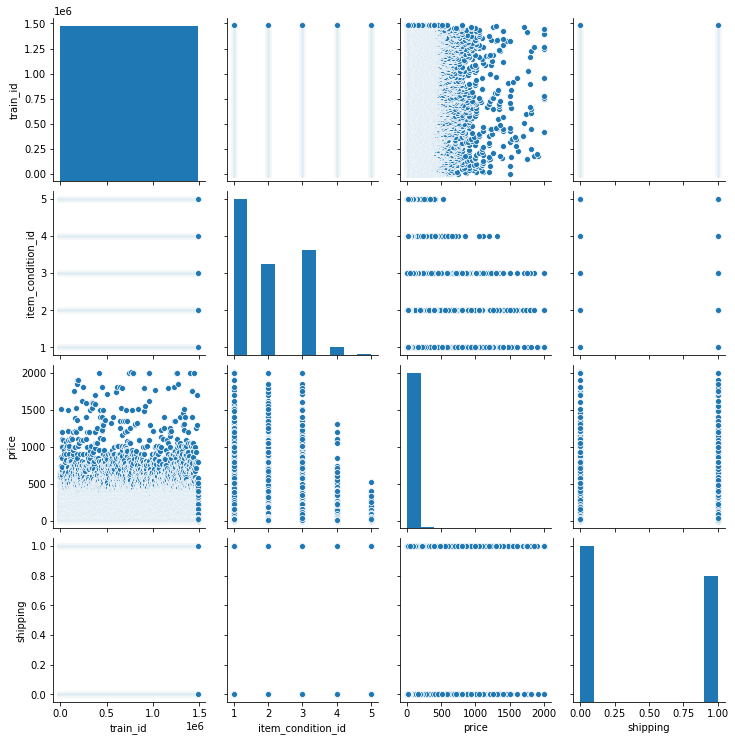

In [0]:
sns.pairplot(df)

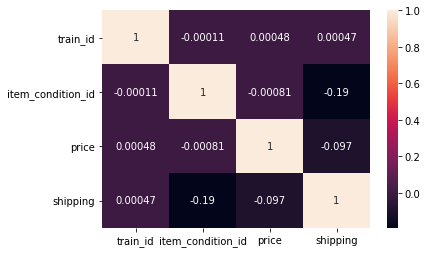

In [0]:
# Visualizing Corelation Matrix
sns.heatmap(df.corr(), annot = True)

this corelation matrix shows that no column is depend on each other

In [0]:
# Tokenizing the categorical features such as name, categoty_name ,item_description and brand_name
#Using Sklearn's Preprocessing library
from sklearn import preprocessing

cat_encoder = preprocessing.LabelEncoder()
brand_encoder = preprocessing.LabelEncoder()
name_encoder = preprocessing.LabelEncoder()
itemDesc_encoder = preprocessing.LabelEncoder()

print("BEFORE ENCODING....................")
print(df['category_name'])
cat_encoder.fit(df['category_name'])
# print(cat_encoder.classes_)
print("AFTER ENCODING....................")
df['category_name'] = cat_encoder.transform(df['category_name'])
print(df['category_name'])

print("BEFORE ENCODING....................")
print(df['brand_name'])
brand_encoder.fit(df['brand_name'])
# print(brand_encoder.classes_)
print("AFTER ENCODING....................")
df['brand_name'] = brand_encoder.transform(df['brand_name'])
print(df['brand_name'])

print("BEFORE ENCODING....................")
print(df['name'])
name_encoder.fit(df['name'])
# print(name_encoder.classes_)
print("AFTER ENCODING....................")
df['name'] = name_encoder.transform(df['name'])
print(df['name'])

print("BEFORE ENCODING....................")
print(df['item_description'])
itemDesc_encoder.fit(df['item_description'])
# print(name_encoder.classes_)
print("AFTER ENCODING....................")
df['item_description'] = itemDesc_encoder.transform(df['item_description'])
print(df['item_description'])



BEFORE ENCODING....................
0                                          Men/Tops/T-shirts
1          Electronics/Computers & Tablets/Components & P...
2                                Women/Tops & Blouses/Blouse
3                         Home/Home Décor/Home Décor Accents
4                                    Women/Jewelry/Necklaces
                                 ...                        
1482530                               Women/Dresses/Mid-Calf
1482531                             Kids/Girls 2T-5T/Dresses
1482532       Sports & Outdoors/Exercise/Fitness accessories
1482533                   Home/Home Décor/Home Décor Accents
1482534                    Women/Women's Accessories/Wallets
Name: category_name, Length: 1482531, dtype: object
AFTER ENCODING....................
0           808
1            86
2          1254
3           485
4          1181
           ... 
1482530    1165
1482531     633
1482532     894
1482533     485
1482534    1276
Name: category_name, Length: 1

Viewing Dataframe for any string values

In [0]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,640807,3,808,4786,10.0,1,806610
1,1,903930,3,86,3557,52.0,0,1090878
2,2,91532,1,1254,4180,10.0,1,115289
3,3,561141,1,485,4786,35.0,1,782305
4,4,45483,1,1181,4786,44.0,0,366652


# Feature Selection

Following Columns Are discarded

1. train_id :- This column is dropped because it is unique for every row so eventually it will not provide any information to machine learning model to make prediction instead name is most obvious feature.



In [0]:
#Checking Unique Values in train_id
print(df['train_id'].nunique())
df.info()

1482531
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482531 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482531 non-null  int64  
 1   name               1482531 non-null  int64  
 2   item_condition_id  1482531 non-null  int64  
 3   category_name      1482531 non-null  int64  
 4   brand_name         1482531 non-null  int64  
 5   price              1482531 non-null  float64
 6   shipping           1482531 non-null  int64  
 7   item_description   1482531 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 101.8 MB


2. item_description:- This column is clearly depends on name column. so we have specific description description for specific product so we can drop item_description

In [0]:
# Dropping Unnecessary Columns.
X = df.drop(labels=['train_id','item_description'],axis=1)
Y = df['price']

# Model Training

### As this is price prediction problem we can use simple linear regression model to get predictions

In [0]:
print(X.head())
print("==========================")
print(Y.head())


     name  item_condition_id  category_name  brand_name  price  shipping
0  640807                  3            808        4786   10.0         1
1  903930                  3             86        3557   52.0         0
2   91532                  1           1254        4180   10.0         1
3  561141                  1            485        4786   35.0         1
4   45483                  1           1181        4786   44.0         0
0    10.0
1    52.0
2    10.0
3    35.0
4    44.0
Name: price, dtype: float64


Splitting Data in Train and Test set. We are using standerd dataset split 80-20 i.e, 80% data will be used for training and 20% data will be used for testing.

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

## Training Model

In [0]:
# Fitting Data To Model
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

print("Training Done")

Training Done


### Evaluating Model Performance of Model Using Test Set Using mean_squared_error

In [0]:
#Taking Model Prediction on test set

y_pred = linear_regressor.predict(X_test)
print("Prediction on test set are taken............")
print(" ")

print("Evaluating .................")
print(" ")


print("Root Mean Squared Error : ",mean_squared_error(y_test,y_pred) ** 0.5)

Prediction on test set are taken............
 
Evaluating .................
 
Root Mean Squared Error :  5.1406521664240396e-14


In [0]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)

X_test_poly = polynomial_features.transform(X_test)
y_poly_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))

8.942777171867435
